This is an exercise from the Stanford Machine Learing course on Coursera. It is a basic linear regression in one variable, using gradient descent. First, we just want to visualize our data set. The set given is not very complicated, so it is useful to generate one.

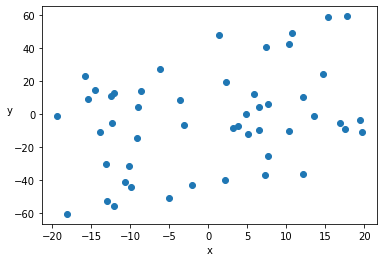

In [442]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import random

#the original data set.
#training_data = np.array([[0, 2, 5, 7, 1, 5], [0.5, 2, 3, 3, 5, 7]])

#the randomly generated data set. 
#We can change the parameters of 'independent' and 'delta' to get more or less of a correlation.
independent = np.random.uniform(-20, 20, size = (50,))
delta = np.random.uniform(-50, 50, size = (50,))
dependent = np.array(independent + delta)

training_data = np.array([independent, dependent ])

x = training_data[0]
y = training_data[1]

data_graph = plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y', rotation = 0)
plt.show()

Here is where we get into the coding: First, we define $h(x)$ and $J(\theta_1, \theta_2)$. Recall that
$$ h(x) = \theta_0 + \theta_1x,\quad J(\theta_1, \theta_2) = \frac{1}{2m}\sum_{i=1}^m(h(x^i) - y^i)^2,$$
where $\theta_1$ and $\theta_2$ are our origional guess, $(x^i, y^i)$ is the $i$th entry of our dataset, and $m$ is the number of datapoints in our set. 

In [443]:
#linear regression function:
def h(theta_0, theta_1, x = training_data[0]):
    return theta_0 + theta_1 * x

#cost function, which we try to minimize:
def J(theta_0, theta_1, x = training_data[0], y = training_data[1]):
    return 1/(2*len(x))*np.sum((h(theta_0, theta_1) - y)**2)

Now, we want to visualize our cost function $J(\theta_1, \theta_2)$:

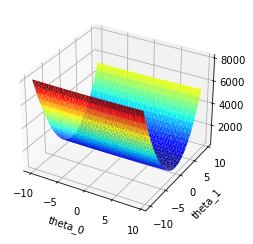

In [444]:
from mpl_toolkits import mplot3d

X = np.arange(-10, 10, 0.5)
Y = np.arange(-10, 10, 0.5)

J_vals = []
for i in X:
    for j in Y:
        J_vals.append([i, j, J(i, j)])

xs = [J_vals[i][0] for i in range(np.size(J_vals, 0))]
ys = [J_vals[i][1] for i in range(np.size(J_vals, 0))]
zs = [J_vals[i][2] for i in range(np.size(J_vals, 0))]


fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_trisurf(xs, ys, zs, cmap=cm.jet, linewidth=0.1)
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show()

Now we perform the gradient descent, using that 
$$ \frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^m(h(x^i) - y^i),\quad\frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^m(h(x^i) - y^i)x^i
$$

In [445]:
#New gradient descent algorithm:
def grad_descent(theta_0, theta_1, alpha = 0.01, epsilon = 0.0001, arr = training_data):
    while abs(alpha * 1/(len(x))*np.sum((h(theta_0, theta_1) - y))) > epsilon and alpha * 1/(len(x))*np.sum((h(theta_0, theta_1) - y)*x) > epsilon:
        temp_0 = theta_0 - alpha * 1/(len(x))*np.sum((h(theta_0, theta_1) - y))
        temp_1 = theta_1 - alpha * 1/(len(x))*np.sum((h(theta_0, theta_1) - y)*x) 
        theta_0 = temp_0     
        theta_1 = temp_1
    return temp_0, temp_1

Now we are ready to apply the regression to our dataset. Let's pick $\theta_0 = \theta_1 = 5$:

theta_0 = 4.902782820410117  and theta_1 = -0.44069768027513234


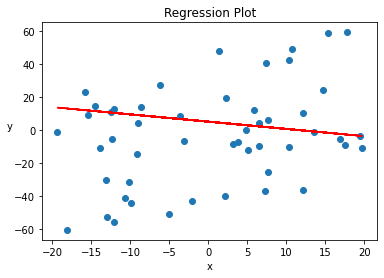

In [446]:
theta_0 = 5
theta_1 = 5

best_fit = grad_descent(theta_0, theta_1)
print('theta_0 =', best_fit[0], ' and theta_1 =', best_fit[1])

fx = h(best_fit[0], best_fit[1])

plt.scatter(x, y)
plt.plot(x, fx, color = 'red')
plt.title('Regression Plot')
plt.xlabel('x')
plt.ylabel('y', rotation = 0)
plt.show()

Looks pretty good!
